# Yelp Advice

Author: Ruixuan Zhao

In [0]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import os

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive"

os.chdir(path)
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Colab Notebooks',
 'STAT628_module2.gslides',
 'Yelp_Review',
 '回归分析方法及其在实验研究与设计中的应用.gslides',
 'yelp.jpg',
 'Yelp_advice.ipynb']

In [0]:
review_word = pd.read_csv("Yelp_Review/mexican_review_p.csv")

In [0]:
review_word.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,2015-04-01 16:30:00,love chinese food love mexican food go wrong c...,1,7,1
1,S337tATeouQJdoPYyir29w,2mxBNBeFrgDszqGS5tdEHA,d_L-rfS1vT3JMzgCUGtiow,5.0,2016-07-25 03:57:19,pick meat planet chef make mexican style dish ...,0,0,0
2,j3vP8537KHvoXNHQIr3haA,Z_HE_KKT7N-WddPTzUQC7A,jScBTQtdAt-8RshaiBEHgw,5.0,2018-05-28 20:56:05,party 3 order fish tacos pork belly banh mi co...,1,0,1
3,CvJy7CdHJqsZNq22fUF7hA,DAssyKNnYBenf0s1uP5iRw,dInxwF8kXVdfLEGTIBRrSw,2.0,2017-04-30 04:13:18,employees busy chat one employee head drive th...,0,1,0
4,a6N51Ov3NEchmqsquNGtMA,qpYllTutvfoKvT5OEl7gGQ,HkbNItNrnXlNo59M0YyoMg,5.0,2016-09-30 19:51:43,come loco mill since open love come especially...,0,0,0


In [0]:
info = pd.read_csv("Yelp_Review/mexican_info.csv")

In [0]:
info.head()

,business_id,name,city,latitude,longitude,star,review_count
0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,Phoenix,33.495194,-112.028588,3.0,18
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,Las Vegas,36.195615,-115.040529,4.5,184
2,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,Toronto,43.666181,-79.316468,3.5,43
3,voZnDQs6Hs3YpNcS-9TALg,New Mexican Grill,Chandler,33.261325,-111.790815,4.0,84
4,jScBTQtdAt-8RshaiBEHgw,Served,Henderson,36.010745,-115.064803,4.5,664


In [0]:
def find_rest_review(bus_id,review_word):
  review_rest = review_word['text'][review_word['business_id']==bus_id]
  review_rest_f =  " ".join(j for j in review_rest)
  return (review_rest_f)

In [0]:
def find_bus(city,info,review_count):
  #bus=info[info['city']==city]
  bus_all=info[info['city']==city]
  bus_id=bus_all[bus_all['review_count']>100]['business_id']
  return (bus_id)


In [0]:
Mesa_bus = find_bus("Mesa",info,100)
Mesa_bus.head()

54     Ouh38adC9WbCRSSyYGtL3Q
429    vT5mKKEcAxhSPj452HHspw
443    XxXmyN3tlroRQ1SOoSXHAA
444    _rXRnGcU3RFtsehmdL0ucw
507    R5WkKWo9ae2gN2feWtB_4g
Name: business_id, dtype: object

In [0]:
len(Mesa_bus)

41

In [0]:
type(Mesa_bus)

pandas.core.series.Series

In [0]:
rev1 = find_rest_review("Ouh38adC9WbCRSSyYGtL3Q",review_word)

In [0]:
rev1

'want like place service bad wish take little bite pride place right street house main street food hit miss salmon salad get huge mess salmon taste old season super thin iceberg lettuce standard grocery store dress avocado fresh yummy though nice chip salsa include salsa great overall place worth risk nunthaporn across street great republica empanada street hibbert first avenue wow excellent food service fast large group surprise able serve us quickly definitely back horrible mean nothing special either get chorizo burger good nothing special certainly would stop need go way return note chip best ever ever service fine staff friendly great dinner spot server absolute delight service fast friendly food excellent definitely back overcharge us 3 salad confront charge us automatic gratuity first time never last sit march 28th first trip mesa az roommate discover place call margarita grill first thing comment excepetional service get manager bartender aaron everything suggest spot appitizer

In [0]:
import nltk
import io 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download("stopwords")

stopwords = set(stopwords.words('english'))
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(-0.5, 399.5, 199.5, -0.5)

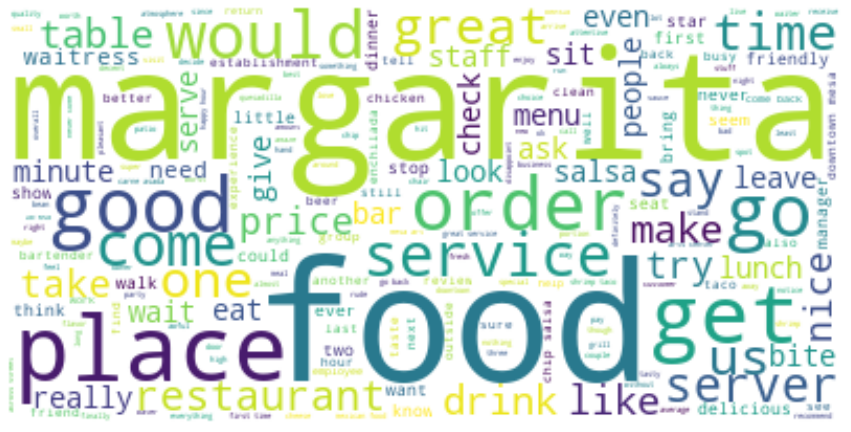

In [0]:

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(rev1)

plt.figure(figsize=(15,10))
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.show()
#plt.savefig("Yelp_Review/wc_lv.png", dpi=500)

In [0]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
rev1_words = word_tokenize(rev1)
rev1_words[:5]

['want', 'like', 'place', 'service', 'bad']

In [0]:
rev1_index = []
num = 0
for word in rev1_words:
  num = num + 1
  if (word == "margarita"):
    rev1_index.append(num)

print(rev1_index)


[139, 228, 250, 331, 668, 1183, 1472, 1869, 2178, 2187, 2463, 2514, 2632, 2683, 3110, 3207, 3294, 3606, 3723, 3762, 3789, 3793, 3900, 4842, 4846, 4930, 4988, 5087, 5159, 5204, 5212, 5582, 5584, 5603, 5630, 5642, 5654, 5697, 5704, 5708, 5932, 6031, 6367, 6371, 6515, 6621, 6688, 6750, 6810, 7098, 7324]


In [0]:
rev1_words[(139-5):(139+5):1]

['roommate',
 'discover',
 'place',
 'call',
 'margarita',
 'grill',
 'first',
 'thing',
 'comment',
 'excepetional']

In [0]:
rev1_words[rev1_words == 'margarita']

'want'

In [0]:
def find_word_near(rest_review,keyword,around):
  words = word_tokenize(rest_review)
  index = []
  num = 0
  for word in words:
    num = num + 1
    if (word == keyword):
      index.append(num)
  res_words = []
  for id in index:
    res_words = res_words + words[(id-around):(id+around):1]
  result =  " ".join(j for j in res_words)
  return(result)



In [0]:
result1 = find_word_near(rev1,'margarita',3)
result1

'place call margarita grill first thing review cadillac margarita yum chicken enchiladas employee come margarita grill tell us order og margarita price sweet orange patrons og margarita bad flavor indication order signature margarita others order mexican grateful dead margarita try music food mmm og margarita awesome work next spicy jalapeno margarita boyfriend order beer nice refresh margarita fresh muddle jalapenos place ever margarita taste though forget restaurants mango margarita yummy perfect combination top freeze margarita drip hand lick bar start margarita use restroom clear get house margarita 5 waitress great variety plate margarita good seem real bite season margarita great id like patient cadillac margarita yummy hit spot 3 birthdays margarita grill server antonio go try margarita please delicious guacamole start dinner margarita price reasonable well reasonable well margarita menu look good name margaritas margarita definitely water worst mango jalapeno margarita rock ama

In [0]:
result2 = find_word_near(rev1,'carne',3)
result2

'shred beef carne asada burrito huge tortilla delicious carne asada slighly sweet sign quality carne asada 4 bite al carbon carne asada quite impress macho nachos carne asada tacos really really enjoy carne asada queso really snack order carne asada quesadilla must flavorful delicious carne asada ever portion great get carne asada macho nachos need salt carne con queso dip ever unfortunately carne asada tacos yummy enchiladas good carne asada tacos even market best carne asada valley quarter'

(-0.5, 399.5, 199.5, -0.5)

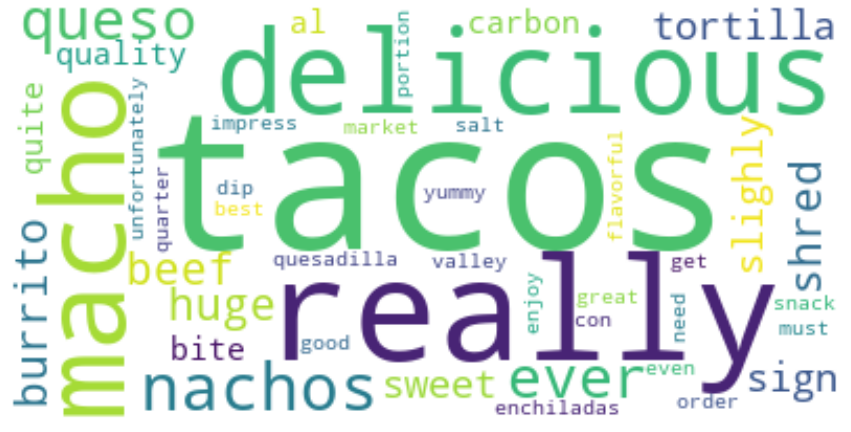

In [0]:
stopwords.update(["carne","asada"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(result2)

plt.figure(figsize=(15,10))
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

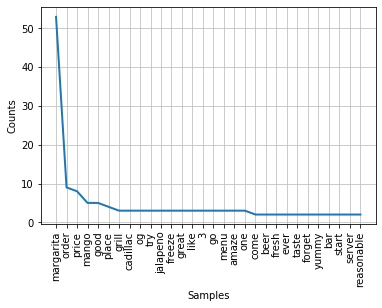

In [0]:
r1=word_tokenize(result1)
fdist1 = FreqDist(r1)
fdist1
import matplotlib.pyplot as plt
fdist1.plot(30,cumulative=False)
plt.show()

In [0]:
fdist1

FreqDist({'12': 1,
          '3': 3,
          '5': 1,
          '50': 1,
          'already': 1,
          'also': 1,
          'although': 1,
          'amaze': 3,
          'antonio': 1,
          'appetizers': 1,
          'around': 1,
          'ask': 2,
          'awesome': 1,
          'bad': 1,
          'bar': 2,
          'bartender': 1,
          'bean': 1,
          'beer': 2,
          'best': 2,
          'bill': 1,
          'birthdays': 1,
          'bite': 1,
          'bland': 2,
          'boast': 1,
          'boyfriend': 1,
          'cadillac': 3,
          'call': 1,
          'carne': 1,
          'certain': 1,
          'check': 1,
          'chicken': 1,
          'clear': 1,
          'combination': 1,
          'come': 2,
          'crack': 1,
          'dead': 1,
          'definitely': 1,
          'delicious': 1,
          'dinner': 1,
          'drip': 1,
          'employee': 1,
          'enchiladas': 1,
          'enjoy': 1,
          'ever': 2,
     

(-0.5, 399.5, 199.5, -0.5)

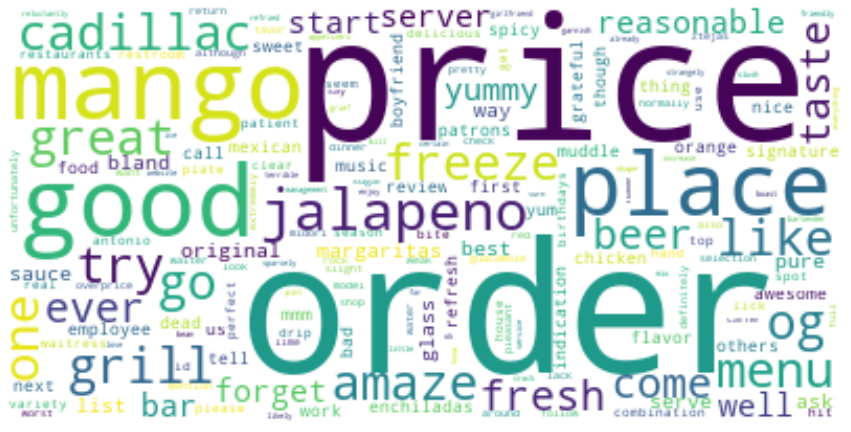

In [0]:
stopwords.update(["margarita"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(result1)

plt.figure(figsize=(15,10))
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")